# Bike Sharing Assignment

# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. They want to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Steps to be followed:
- Step 1: Reading and Understanding the Data
- Step 2: Data Visualization
- Step 3: Data Preparation
- Step 4: Splitting the Data into Training and Testing Sets
- Step 5: Building Model
- Step 6: Residual Analysis of the train data
- Step 7: Making Predictions Using the Final Model
- Step 8: Model Evaluation

## Step 1: Reading and Understanding the Data

In [297]:
#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [298]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [299]:
#Read the data
bikedata = pd.read_csv('day.csv')

In [300]:
#Observe the dataset
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [301]:
#Inspect the no of rows and columns
bikedata.shape

(730, 16)

In [302]:
#Inspect the data types and null values
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [303]:
#Inspect the statistical values
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Observation:**
1. All are non null values hence missing value treatment is not required.
2. Datatype of 'dteday' column is object which should be of Date datatype.
3. 'cnt' is the target variable.
4. By looking at data dictionary, there are some fields which are categorical in nature e.g. season, mnth, weekday, weathersit, yr, holiday, workingday. These can be converted to categorical values
5. Based on the observation following columns can be removed
    - instant - this is unique record id
    - dteday - Since we already have year and month columns, this column can be dropped
    - casual and registered - These two columns contain the number of bikes booked by different categories of customers. We ignore these two columns as our goal is to find the total number of bikes, not a specific category. Also, during prediction the data for casual and registered users will not be available.

In [304]:
#Display columns
bikedata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [305]:
#Drop columns instant, dteday, casual and registered
bikedata_1 = bikedata[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [306]:
bikedata_1.shape

(730, 12)

In [307]:
#convert season column to category data type and map values as per data dictionary
bikedata_1['season'] = bikedata_1['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikedata_1['season'].astype('category')
bikedata_1['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [308]:
bikedata_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [309]:
#convert mnth column to category data type and map values as per data dictionary
bikedata_1['mnth'] = bikedata_1['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikedata_1['mnth'].astype('category')
bikedata_1['mnth'].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [310]:
#By looking at calendar 01.01.2018 falls on Monday. Assigning the days accordingly.
bikedata_1['weekday'] = bikedata_1['weekday'].map({0:'Tues',1:'Wed', 2:'Thurs', 3:'Fri', 4:'Sat',5:'Sun',6:'Mon'})
bikedata_1['weekday'].astype('category')
bikedata_1['weekday'].value_counts()

Mon      105
Tues     105
Wed      105
Thurs    104
Sat      104
Sun      104
Fri      103
Name: weekday, dtype: int64

In [311]:
#Convert to categorical variable 
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bikedata_1['weathersit'] = bikedata_1['weathersit'].map({1:'Clear', 2:'Cloudy', 3:'LSLR', 4:'HRHS'})
bikedata_1['weathersit'].astype('category')
bikedata_1['weathersit'].value_counts()

Clear     463
Cloudy    246
LSLR       21
Name: weathersit, dtype: int64

In [312]:
bikedata_1['yr'].astype('category')
bikedata_1['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [313]:
# whether day is a holiday or not (0: No, 1: Yes)
bikedata_1['holiday'].astype('category')
bikedata_1['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [314]:
#if day is neither weekend nor holiday is 1, otherwise is 0.
bikedata_1['workingday'].astype('category')
bikedata_1['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

## Step2: Data Visualisation
1. Visualising the numerical variables
- Observe multicolinearity
-  Identify if some predictors directly have a strong association with the outcome variable
2. Visualising the categorical variables

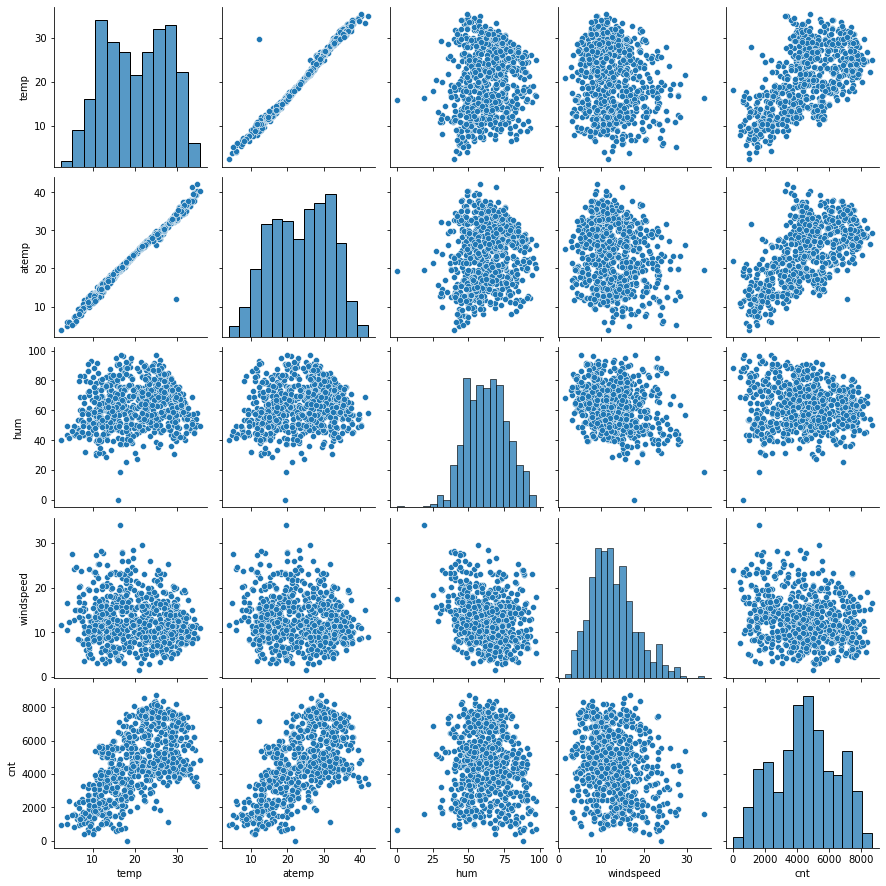

In [315]:
#Visualising the numerical variables
bikedata_1_num = bikedata_1[['temp','atemp','hum','windspeed', 'cnt']]
sns.pairplot(bikedata_1_num)
plt.show()

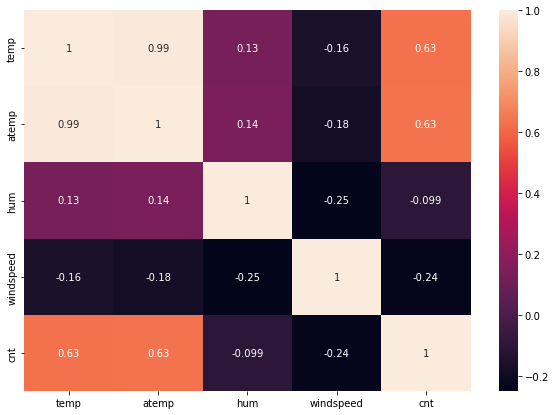

In [316]:
#Plot correlations on heatmap
plt.figure(figsize=(10,7))
sns.heatmap(bikedata_1_num.corr(), annot=True)
plt.show()

**Observation**
1. temp and atemp are highly colinear and hence any one of them can be dropped.
2. cnt is highly correlated positively with temp and atemp. Hence, temp or atemp can be a good predictor.
3. cnt is negatively correlated with windspeed which means there will be less demand on windy days than normal days. Hence, windspeed can be a good predictor.

In [317]:
#Drop atemp
bikedata_1.drop('atemp',axis=1,inplace=True)

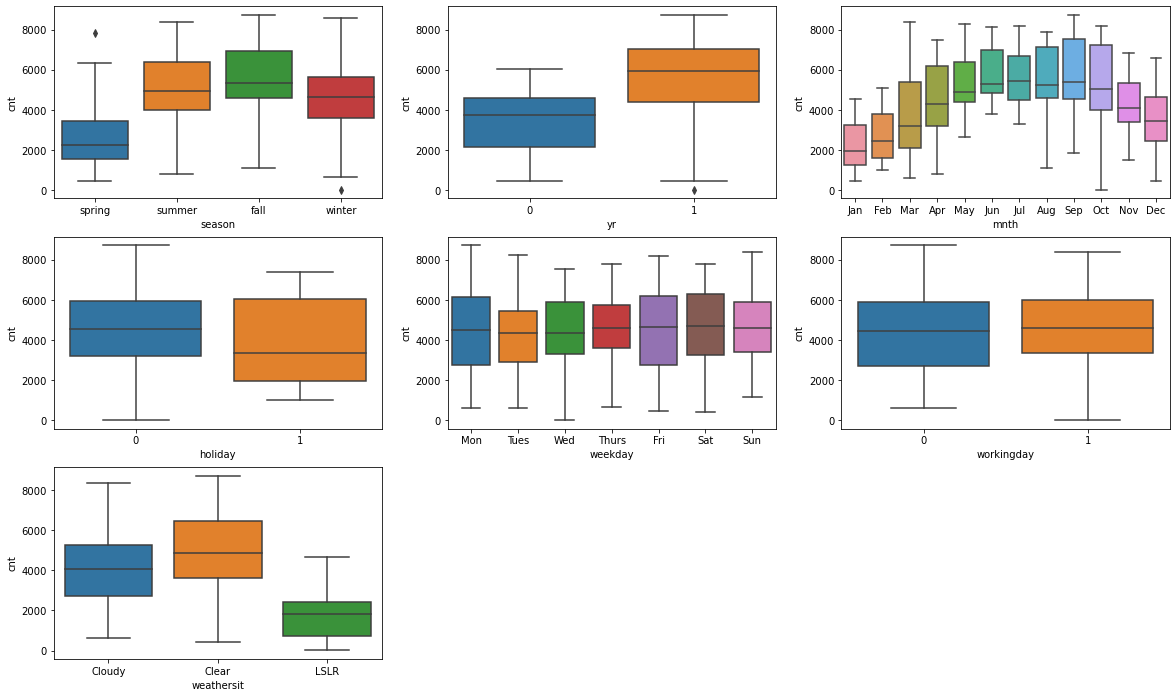

In [318]:
#Visualising the categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikedata_1)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikedata_1)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikedata_1)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikedata_1)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikedata_1)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikedata_1)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikedata_1)
plt.show()

**Observation**
1. The demand for bike is high in fall and summer. It is comparatively low in spring. Hence, season can be a good predictor.
2. The demand for bike was higher in 2019 as compared to 2018. Year can be a good predictor.
3. The demand for bike is highest in Sep and lowest in Jan. Month can be a good predictor.
4. The demand for bike on holidays is low than compared with non holidays. Holiday can be a good predictor.
5. The demand for bike is higher on clear days than compared with clody and rainy days. Weather situation can be a good predictor.
6. Working day and weekday does not have much impact on the count. These variables may not be good for prediction.
7. There is no record on Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

## Step 3: Data Preparation

### Creating Dummy Variables
1. Create a DUMMY variable for the four categorical variables "season", "mnth", "weekday", and "weathersit". These variables have different levels and are already converted to categorical data type.
2. Other columns "yr", "holiday" and "workingday" have binary values 0 and 1. Hence, no need to create dummy variables for these.

In [319]:
#Create dummy variables
bikedata_1_cat = bikedata_1[['season','mnth','weekday','weathersit']]
bikedata_1_dummies = pd.get_dummies(bikedata_1_cat, drop_first=True)

In [320]:
#concatenate dummy data with the earlier dataframe
bikedata_1 = pd.concat([bikedata_1, bikedata_1_dummies],axis=1)

In [321]:
#remove unwanted columns
bikedata_1.drop(bikedata_1_cat.columns, axis=1, inplace=True) 

In [322]:
#Observe columns
bikedata_1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Cloudy,weathersit_LSLR
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Observation**
- Dummy variables are created correctly.

## Step 4: Splitting the Data into Training and Testing Sets

In [323]:
#Split the data into training and testing set
df_train, df_test = train_test_split(bikedata_1, train_size=0.7, test_size=0.3, random_state=100)

In [324]:
#Observe train dataset
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Cloudy,weathersit_LSLR
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664,0,1,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,56.0833,16.292189,2739,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [325]:
#Rescaling the features
scaler = MinMaxScaler()
#apply scaler to variables other than binary values(0 and 1) and dummy variables
listtoscale = ['temp', 'hum', 'windspeed','cnt']
df_train[listtoscale] = scaler.fit_transform(df_train[listtoscale])

In [326]:
#Observe scaled values
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Cloudy,weathersit_LSLR
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.764151,0,1,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.832835,0,0,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.218017,1,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.312586,0,0,1,...,0,0,1,0,0,0,0,0,1,0


**Observation**
- The variables have been correctly scaled.

## Step 5: Building Model

1. Dividing into X and Y sets for the model building
2. Build first model with all the features
3. Use RFE approach for feature elimination
4. Use statsmodel api to build the model and view statistics
5. Observe multicolinearity using VIF model
6. Drop variables with high VIF(>5) and high p-vale(>0.05)

In [327]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [328]:
X_train.shape

(510, 28)

### Build first model with all the features
### Model 1

In [329]:
#Build first model with all the features
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
#View summary statistics
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 09 May 2022   Prob (F-statistic):          8.74e-182
Time:                        00:46:57   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2429      0.035      6.854      0.000       0.173       0.313
yr                    0.2321      0.008     28.820      0.000       0.216       0.248
holiday               0.0067      0.024      0.278      0.781      -0.041       0.054
workingday            0.0937      0.012      7.783      0.000       0.070       0.117
temp                  0.4506      0.046      9.734      0.000       0.360       0.542
hum                  -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed            -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring        -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer         0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter         0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug              0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec             -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb             -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan             -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul             -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun             -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar              0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May              0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov             -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct              0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep              0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon           0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat          -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun           0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thurs        -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tues          0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed          -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_Cloudy    -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_LSLR      -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:      

**Observation**
1. With 28 features, model has adj R^2 value 84.5% which is good. But, we should reduce the features which may not be relevant

### Using RFE Approach to build the model

In [330]:
#Use RFE approach for variable number equal to 15
#Instantiate
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe_1 = RFE(lm,15)
rfe_1 = rfe_1.fit(X_train, y_train)
print(rfe_1.support_)
print(rfe_1.ranking_)

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True  True False False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  1 12 11  9
  7  8  1  1]


In [331]:
#View columns selected by RFE
X_train.columns[rfe_1.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Mon', 'weathersit_Cloudy',
       'weathersit_LSLR'],
      dtype='object')

### Using statsmodels to build the model
### Model 2

In [332]:
#Build second model with all the features
col1 = X_train.columns[rfe_1.support_]
X_train_rfe_1 = X_train[col1]

X_train_rfe_1 = sm.add_constant(X_train_rfe_1)
lr1 = sm.OLS(y_train, X_train_rfe_1).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 09 May 2022   Prob (F-statistic):          2.31e-191
Time:                        00:46:58   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2510      0.036      6.949      0.000       0.180       0.322
yr                    0.2305      0.008     28.807      0.000       0.215       0.246
holiday              -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday            0.0435      0.012      3.781      0.000       0.021       0.066
temp                  0.5098      0.034     14.851      0.000       0.442       0.577
hum                  -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed            -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring        -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer         0.0497      0.015      3.346      0.001       0.020       0.079
season_winter         0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan             -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul             -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sep              0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Mon           0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_Cloudy    -0.0578      0.010     -5.574      0.000      -0.078      -0.037
weathersit_LSLR      -0.2488      0.026     -9.560      0.000      -0.300      -0.198
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation**
- The model with 15 features is having adj R^2 value as 84.4. So model is behaving well as it has gone from 84.5% to 84.4% only. 
- p-values for all variables are less than 0.05

### Observe multicolinearity using VIF model

In [333]:
#define function to calculate VIF
def calcVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [334]:
#drop const variable created earlier
X_train_new = X_train_rfe_1.drop(['const'], axis=1)

In [335]:
# Calculate the VIFs
vif1 = calcVIF(X_train_new)

In [336]:
#Observe vif values
vif1

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
13,weathersit_Cloudy,2.29
0,yr,2.09
12,weekday_Mon,1.98


**Observation**
- Few variables are still having high VIF values (>5). Hence we can further use RFE approach to eliminate more features to make the model relevant.

### Using RFE approach to further eliminate the features

In [337]:
#Use RFE approach for variable number equal to 10
#Instantiate
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe_2 = RFE(lm,10)
rfe_2 = rfe_2.fit(X_train, y_train)
print(rfe_2.support_)
print(rfe_2.ranking_)

[ True  True False  True  True  True  True False  True False False False
 False  True False False False False False  True False False False False
 False False False  True]
[ 1  1  5  1  1  1  1  3  1 11  8  9  6  1 18 19 10  7 15  1  4 17 16 14
 12 13  2  1]


In [338]:
#View columns selected by RFE
X_train.columns[rfe_2.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_LSLR'],
      dtype='object')

### Using statsmodels to build the model
### Model 3

In [339]:
#Build third model with all the features
col2 = X_train.columns[rfe_2.support_]
X_train_rfe_2 = X_train[col2]

X_train_rfe_2 = sm.add_constant(X_train_rfe_2)
lr2 = sm.OLS(y_train, X_train_rfe_2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.53e-184
Time:                        00:46:58   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3769      0.031     12.133      0.000       0.316       0.438
yr                  0.2281      0.008     27.102      0.000       0.212       0.245
holiday            -0.0920      0.026     -3.472      0.001      -0.144      -0.040
temp                0.5147      0.031     16.542      0.000       0.454       0.576
hum                -0.2728      0.032     -8.542      0.000      -0.336      -0.210
windspeed          -0.1887      0.026     -7.194      0.000      -0.240      -0.137
season_spring      -0.1005      0.015     -6.536      0.000      -0.131      -0.070
season_winter       0.0653      0.013      5.153      0.000       0.040       0.090
mnth_Jul           -0.0805      0.018     -4.538      0.000      -0.115      -0.046
mnth_Sep            0.0598      0.016      3.723      0.000       0.028       0.091
weathersit_LSLR    -0.1980      0.026     -7.659      0.000      -0.249      -0.147
==============================================================================
Omnibus:                       51.023   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.492
Skew:                          -0.593   Prob(JB):                     1.51e-22
Kurtosis:                       4.823   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation**
- The model with 10 features is having adj R^2 value as 82.6. So model is behaving well as it has gone from 84.4% to 82.6% only. 
- p-values for all variables are almost 0 now and in acceptable range.

### Observe multicolinearity using VIF model

In [340]:
#drop const variable created earlier
X_train_new2 = X_train_rfe_2.drop(['const'], axis=1)

In [341]:
# Calculate the VIFs
vif2 = calcVIF(X_train_new2)

#Observe vif values
vif2

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_spring,2.40
0,yr,2.06
6,season_winter,1.98
7,mnth_Jul,1.40
8,mnth_Sep,1.20
9,weathersit_LSLR,1.11
1,holiday,1.04


**Observation**
- Few variables are still having high VIF values (>5). Hence we can further use RFE approach to eliminate more features to make the model relevant.

### Using RFE approach to further eliminate the features

In [342]:
#Use RFE approach for variable number equal to 7
#Instantiate
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe_3 = RFE(lm,7)
rfe_3 = rfe_3.fit(X_train, y_train)
print(rfe_3.support_)
print(rfe_3.ranking_)

[ True False False  True  True  True  True False False False False False
 False  True False False False False False False False False False False
 False False False  True]
[ 1  2  8  1  1  1  1  6  3 14 11 12  9  1 21 22 13 10 18  4  7 20 19 17
 15 16  5  1]


In [343]:
#View columns selected by RFE
X_train.columns[rfe_3.support_]

Index(['yr', 'temp', 'hum', 'windspeed', 'season_spring', 'mnth_Jul',
       'weathersit_LSLR'],
      dtype='object')

### Using statsmodels to build the model
### Model 4

In [344]:
#Build third model with all the features
col3 = X_train.columns[rfe_3.support_]
X_train_rfe_3 = X_train[col3]

X_train_rfe_3 = sm.add_constant(X_train_rfe_3)
lr3= sm.OLS(y_train, X_train_rfe_3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Mon, 09 May 2022   Prob (F-statistic):          2.34e-178
Time:                        00:46:58   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4277      0.030     14.348      0.000       0.369       0.486
yr                  0.2301      0.009     26.240      0.000       0.213       0.247
temp                0.4480      0.027     16.720      0.000       0.395       0.501
hum                -0.2412      0.033     -7.324      0.000      -0.306      -0.176
windspeed          -0.2066      0.027     -7.591      0.000      -0.260      -0.153
season_spring      -0.1487      0.013    -11.498      0.000      -0.174      -0.123
mnth_Jul           -0.0901      0.018     -4.945      0.000      -0.126      -0.054
weathersit_LSLR    -0.1867      0.027     -6.933      0.000      -0.240      -0.134
==============================================================================
Omnibus:                       45.817   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.848
Skew:                          -0.547   Prob(JB):                     8.40e-20
Kurtosis:                       4.714   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation**

- The model with 7 features is having adj R^2 value as 82.6. So model is behaving well as it has gone from 82.6% to 81.1% only.
- p-values for all variables are 0 now which is a good indication.

### Observe multicolinearity using VIF model

In [345]:
#drop const variable created earlier
X_train_new3 = X_train_rfe_3.drop(['const'], axis=1)

In [346]:
# Calculate the VIFs
vif3 = calcVIF(X_train_new3)

#Observe vif values
vif3

,Features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,yr,2.03
4,season_spring,1.80
5,mnth_Jul,1.35
6,weathersit_LSLR,1.11


**Observation**

hum is having highest VIF value 10.47 which is > 5. Hence we can drop hum.

In [347]:
#Drop hum column
X_train_new3.drop("hum",axis=1,inplace=True)
X_train_new3

,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_LSLR
653,1,0.509887,0.300794,0,0,0
576,1,0.815169,0.264686,0,1,0
426,1,0.442393,0.255342,1,0,0
728,1,0.245101,0.663106,1,0,0
482,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...
526,1,0.824514,0.355596,0,0,0
578,1,0.863973,0.187140,0,0,0
53,0,0.202618,0.111379,1,0,0
350,0,0.248216,0.431816,0,0,0


### Build the model using statsmodels
### Model 5

In [348]:
#Build the fourth model using statsmodels
X_train_rfe_4 = sm.add_constant(X_train_new3)
lr4 = sm.OLS(y_train, X_train_rfe_4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Mon, 09 May 2022   Prob (F-statistic):          1.37e-168
Time:                        00:46:58   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2596      0.020     12.986      0.000       0.220       0.299
yr                  0.2360      0.009     25.713      0.000       0.218       0.254
temp                0.4279      0.028     15.277      0.000       0.373       0.483
windspeed          -0.1524      0.028     -5.536      0.000      -0.206      -0.098
season_spring      -0.1413      0.014    -10.427      0.000      -0.168      -0.115
mnth_Jul           -0.0715      0.019     -3.769      0.000      -0.109      -0.034
weathersit_LSLR    -0.2413      0.027     -8.873      0.000      -0.295      -0.188
==============================================================================
Omnibus:                       54.941   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.150
Skew:                          -0.657   Prob(JB):                     1.09e-22
Kurtosis:                       4.742   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation**
- The model with 6 features is having adj R^2 value as 79.1. So model is behaving well as it has gone from 81.1% to 79.1% only. 
- p-values for all variables are 0 now which is a good indication.

### Observe multicolinearity using VIF model

In [349]:
#drop const variable created earlier
X_train_new4 = X_train_rfe_4.drop(['const'], axis=1)

In [350]:
# Calculate the VIFs
vif4 = calcVIF(X_train_new4)

#Observe vif values
vif4

,Features,VIF
1,temp,3.95
2,windspeed,3.72
0,yr,2.03
3,season_spring,1.49
4,mnth_Jul,1.26
5,weathersit_LSLR,1.04


**Observation**
- All VIF values are < 5. Hence, we can finalize this model.

### Step 6: Residual Analysis of the train data

In [351]:
#Use final model to predict values on train dataset
y_train_pred = lr4.predict(X_train_rfe_4)

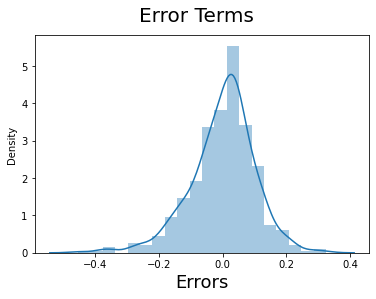

In [352]:
#Plot the error terms to see if they are normally distributed
fig=plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
#heading
fig.suptitle('Error Terms', fontsize=20)
#X-Label
plt.xlabel('Errors', fontsize=18)
plt.show()

**Observation**
- Error terms are normally distributed.

### Step 7: Making Predictions Using the Final Model
1. Rescale the features for the test dataset
2. Split the dataset into X and y.
3. Make predictions on the test dataset

In [353]:
#Rescaling the features
scaler = MinMaxScaler()
#apply scaler to variables other than binary values(0 and 1) and dummy variables
df_test[listtoscale] = scaler.fit_transform(df_test[listtoscale])

In [354]:
#Observe scaled values
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Cloudy,weathersit_LSLR
184,0,1,0,0.837241,0.534223,0.149393,0.704300,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.911423,0.470417,0.231142,0.725421,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.496221,0.777843,0.443398,0.278853,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.890387,0.236659,0.449707,0.545512,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.821739,0.070765,0.682387,0.569148,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.224955,0.603829,0.388364,0.315062,1,0,0,...,0,0,0,0,0,0,1,0,1,0
702,1,0,1,0.503971,0.667633,0.383644,0.775082,0,0,1,...,0,0,0,0,0,1,0,0,0,0
127,0,0,0,0.573725,0.525522,0.132095,0.489314,0,1,0,...,0,0,0,0,0,0,1,0,0,0
640,1,0,1,0.745342,0.751160,0.111637,0.896530,0,0,1,...,1,0,0,0,0,0,0,0,1,0


**Observation**
- The values have been properly scaled.

In [355]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [356]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Cloudy,weathersit_LSLR
184,0,1,0,0.837241,0.534223,0.149393,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.911423,0.470417,0.231142,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.496221,0.777843,0.443398,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.890387,0.236659,0.449707,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.821739,0.070765,0.682387,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [357]:
#Create new dataframe by dropping variables
X_test_new =X_test[X_train_new4.columns]
#Add constant
X_test_sm = sm.add_constant(X_test_new)

In [358]:
#making predictions on the test set using final model
y_test_pred = lr4.predict(X_test_sm)

### Step 8: Model Evaluation

Text(0, 0.5, 'y_test_pred')

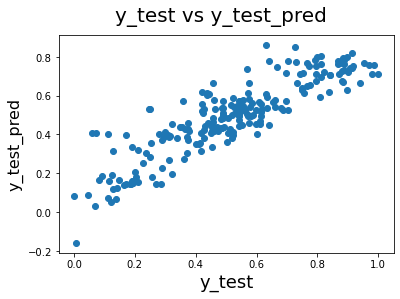

In [359]:
#Plot y_test and y_test_pred
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
#add heading
fig.suptitle('y_test vs y_test_pred', fontsize=20)
#add X-label
plt.xlabel('y_test', fontsize=18)     
#add Y-label
plt.ylabel('y_test_pred', fontsize=16)  

**Observation**
- Model is doing well on the test data.

In [360]:
#Calculate the R-squared score on the test set
r2_score(y_test, y_test_pred)

0.764630265260871

**Observation**
- The R-squared on the test dataset is 76.5%
- The R-squared on the train dataset is 79.3%
- The adjusted R-Squared on the train dataset is 79.1%
- Coefficients of constant and final predictors are as below:
    - const:           0.2596
    - yr:              0.2360
    - temp:            0.4279
    - ws:             -0.1524
    - season_spring:  -0.1413
    - mnth_Jul:       -0.0715
    - weathersit_C:   -0.2413

The equation of our best fitted line is:

cnt = 0.2596 + (0.2360 X yr) + (0.4279 X temp) + (-0.1524 X windspeed) + (-0.1413 X season_spring) + (-0.0715 X mnth_Jul) + (-0.2413 X weathersit_C)

### Linear Relationship Assumption Check

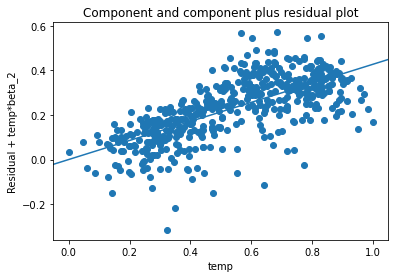

In [367]:
#check linearity assumption between temp and cnt
sm.graphics.plot_ccpr(lr4,'temp')
plt.show()

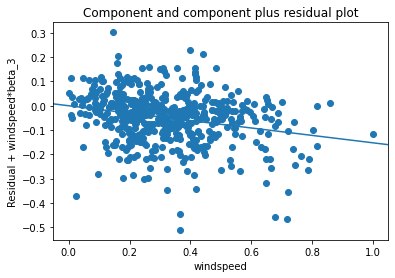

In [362]:
#check linearity assumption between windspeed and cnt
sm.graphics.plot_ccpr(lr4,'windspeed')
plt.show()

**Observation**
- Linear relationship exists.

#### Multicolinearity Check

In [363]:
#print columns selected by RFE
col4 = X_train_new4.columns
col4

Index(['yr', 'temp', 'windspeed', 'season_spring', 'mnth_Jul',
       'weathersit_LSLR'],
      dtype='object')

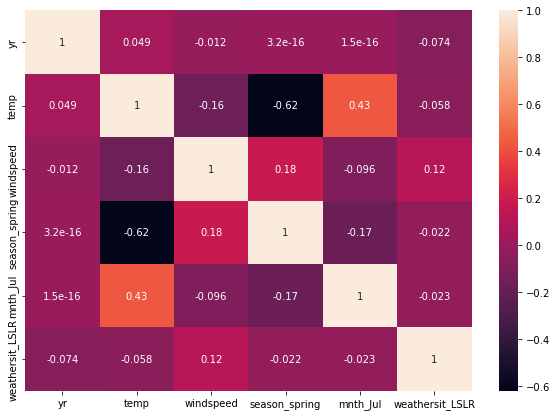

In [364]:
# Plot heatmap to understand the correlations between these variables
plt.figure(figsize=(10,7))

sns.heatmap(bikedata_1[col4].corr(), annot=True)
plt.show()

**Observation**
- This shows that our final predictors are not correlated. 

### Homoscedasticity Check
- Homoscedasticity in a model means that the error is constant along the values of the dependent variable.

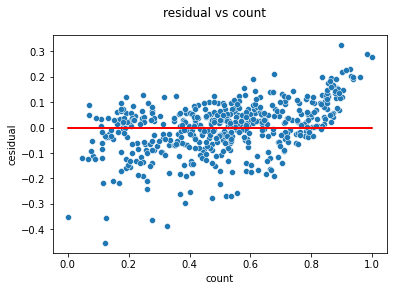

In [365]:
#Plot residual vs count plot
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('count')
plt.ylabel('cesidual')
plt.suptitle('residual vs count')
plt.show()

**Observation**
- Homocedasticity is present

## Conclusion
- The model with 6 variables [yr, temp, windspeed, season_spring, mnth_Jul, weathersit_C] is finalized.
- Hence, we conclude that these 6 variables are impacting the demand of shared bikes.
- By looking at coefficients top 3 features contributing significantly towards explaining the demand of the shared bikes are
    1. temp (coef = 0.4279)
    2. year (coef = 0.2360)
    3. weathersit_Light Snow, Light Rain (coef = -0.2413)
- This model now can be used further for predictions of the demand of the shared bikes.

## Recommendations
1. The demand is more during higher temperatures and clear weather conditions. Hence, company should plan for more demands during these conditions.
2. In year 2019, the demand was more. We can interpret that over the time people have got more edcuated towards shared bike rentals. Year on year rise in the demand of shared bikes can be planned.
3. During difficult weather conditions like snow and rain, demand of the bikes is going down. Hence, company can plan discounts or any offer to maintain the demand of the bikes.